In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats as stat
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from math import ceil
import plotly.express as px

In [202]:
df = pd.read_csv('processed_data.csv')

In [203]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,193.32,33.6,0.627,50,1
1,1,85.0,66.0,29,60.82,26.6,0.351,31,0
2,8,183.0,64.0,19,229.85,23.3,0.672,32,1
3,1,89.0,66.0,23,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35,168.00,43.1,1.200,33,1


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               742 non-null    int64  
 1   Glucose                   742 non-null    float64
 2   BloodPressure             742 non-null    float64
 3   SkinThickness             742 non-null    int64  
 4   Insulin                   742 non-null    float64
 5   BMI                       742 non-null    float64
 6   DiabetesPedigreeFunction  742 non-null    float64
 7   Age                       742 non-null    int64  
 8   Outcome                   742 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 52.3 KB


In [205]:
df.duplicated().sum()

0

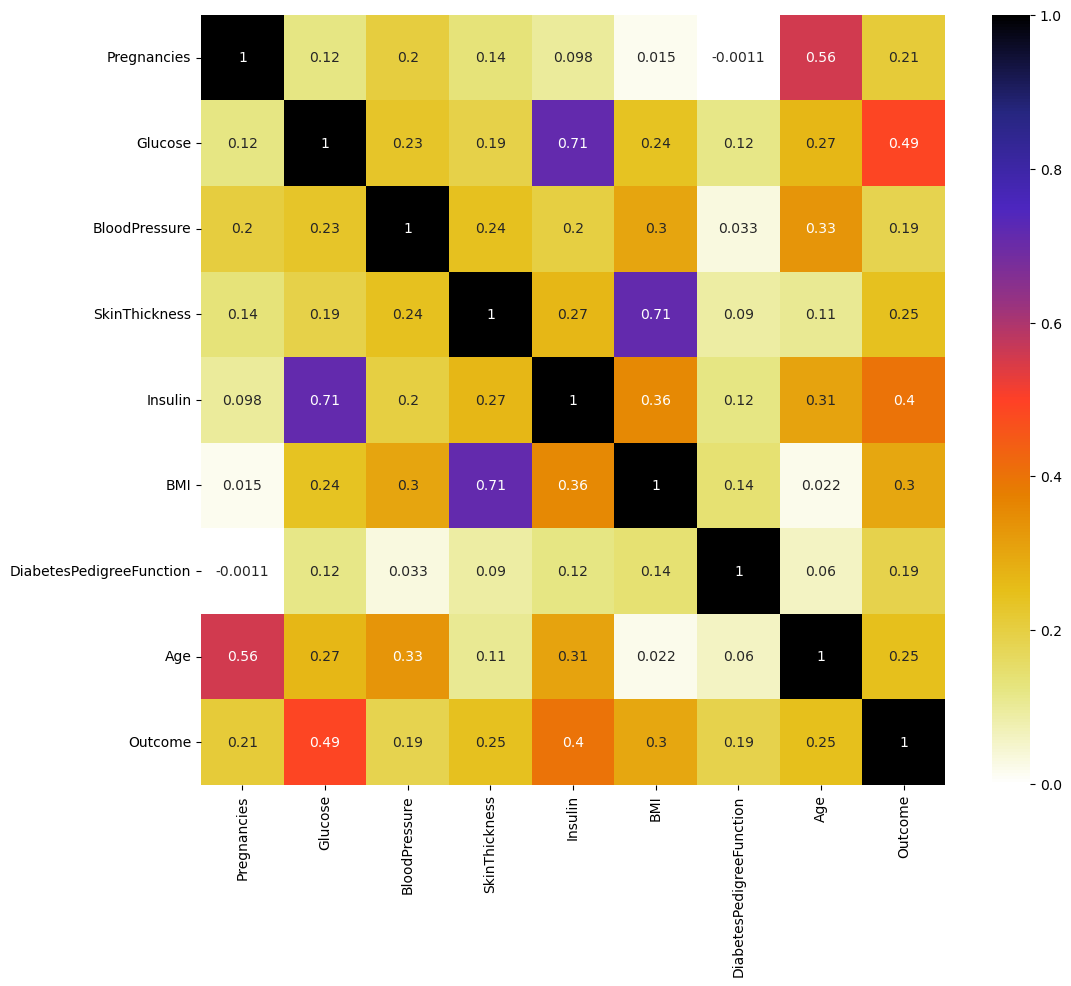

In [206]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [207]:
cols=['Glucose','BloodPressure','Insulin','BMI','SkinThickness','DiabetesPedigreeFunction','Age','Pregnancies','Outcome',]

In [208]:
import plotly.graph_objects as go

# Loop through each feature in cols[:-1]
for label in cols[:-1]:
    if label not in df.columns:
        print(f"Column '{label}' not found in the DataFrame. Skipping...")
        continue

    fig = go.Figure()
    
    # Add scatter plot for the current feature vs. 'Outcome'
    fig.add_trace(
        go.Scatter(
            x=df[label],
            y=df['Outcome'],
            mode='markers',
            marker=dict(
                size=8,
                color=df['Outcome'],  # Color points based on 'Outcome' values
                colorscale='Viridis',  # Color scale
                showscale=True         # Show color scale legend
            ),
            name=label
        )
    )
    
    # Update the layout for the current feature
    fig.update_layout(
        title=f"Scatter Plot: {label} vs Outcome",
        xaxis_title=label,
        yaxis_title="Outcome",
        height=600,
        width=800
    )
    
    # Display the plot
    fig.show()


In [209]:
# Global variables
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

In [210]:
# Create a 3x3 grid of subplots
fig = make_subplots(rows=3, cols=3, subplot_titles=features + ['Target'])

# Define a color palette
colors = [
    'rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)',
    'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)', 'rgba(140, 86, 75, 0.8)',
    'rgba(227, 119, 194, 0.8)', 'rgba(127, 127, 127, 0.8)', 'rgba(188, 189, 34, 0.8)'
]

# Add histograms for each feature
for i, feature in enumerate(features):
    row, col = (i // 3) + 1, (i % 3) + 1
    fig.add_trace(
        go.Histogram(
            x=df[feature],
            name=feature,
            marker_color=colors[i],
            hoverinfo="x+y",
            nbinsx=10
        ),
        row=row,
        col=col
    )

# Add target distribution
fig.add_trace(
    go.Histogram(
        x=df[target],
        name=target,
        marker_color=colors[-1],
        hoverinfo="x+y",
        nbinsx=2
    ),
    row=3,
    col=3
)

# Update layout for better appearance
fig.update_layout(
    height=900,
    width=900,
    title_text="Data Distributions",
    showlegend=False,
    plot_bgcolor='rgba(240, 240, 240, 0.9)',  # Light grey background
    margin=dict(t=50, l=20, r=20, b=20)
)

# Show the interactive figure
fig.show()

In [211]:
# Define a list of colors for the box plots
colors = [
    "royalblue", "seagreen", "darkorange", "purple", 
    "crimson", "goldenrod", "teal", "coral", "deepskyblue"
]

# Ensure the colors list is long enough for all features
colors = (colors * (len(cols) // len(colors) + 1))[:len(cols)]

# Determine the number of rows and columns based on the number of features
num_features = len(cols)
num_cols = 4  # Fixed number of columns
num_rows = ceil(num_features / num_cols)

# Create a subplot grid with the calculated number of rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=cols)

# Loop through each feature and add a box plot with its color
for i, feature in enumerate(cols):
    row, col = (i // num_cols) + 1, (i % num_cols) + 1  # Calculate row and column index
    fig.add_trace(
        go.Box(
            y=df[feature],
            name=feature,
            boxmean=True,
            marker_color=colors[i]
        ),
        row=row,
        col=col
    )

# Update layout for the entire figure
fig.update_layout(
    height=300 * num_rows,  # Adjust height dynamically
    width=1200,            # Fixed width
    title_text="Colorful Box Plots of Features",
    showlegend=False
)

# Display the figure
fig.show()

In [212]:
def clean_outlier_re(col,outlier,df,value ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        for j in ind :
            df.loc[j, col] = value
    return df

In [213]:
def clean_outlier_drop(col,outlier,df ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        df=df.drop(index=ind,axis=0)
    return df

In [214]:
def find_outlier(cols,data):#outlier 
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers_list = data[(data[cols] < lower_bound) | (data[cols] > upper_bound)][cols].unique().tolist()
    return outliers_list,lower_bound,upper_bound


In [215]:
for i in cols[:-1]:
    outlier,l,u = find_outlier(i,df)
    print(i," :",outlier)  

Glucose  : []
BloodPressure  : []
Insulin  : []
BMI  : []
SkinThickness  : []
DiabetesPedigreeFunction  : []
Age  : []
Pregnancies  : []


In [216]:
df.shape

(742, 9)

In [217]:
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title('Histogram of '+feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title('Probability Plot of '+feature)
    plt.show()


In [218]:
data = df.copy()

In [219]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,193.32,33.6,0.627,50,1
1,1,85.0,66.0,29,60.82,26.6,0.351,31,0
2,8,183.0,64.0,19,229.85,23.3,0.672,32,1
3,1,89.0,66.0,23,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35,168.00,43.1,1.200,33,1


In [220]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [221]:
def scale(df,oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    if oversample:
        
        # ros = TomekLinks()
        # ros = ADASYN()
        # ros = RandomOverSampler(random_state=41)
        # x, y = ros.fit_resample(x, y)
        ros=SMOTEENN(random_state=41)
        # ros=SMOTE()
        x, y = ros.fit_resample(x,y)
    #data = np.hstack([x,np.reshape(y,(-1,1))])
    return x, y

In [222]:
reduced_features = ['BloodPressure', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness']  # Keep these
df = df.drop(columns=reduced_features, axis=1)

In [223]:
df['Outcome'].value_counts()

Outcome
0    489
1    253
Name: count, dtype: int64

In [224]:
df.shape

(742, 5)

In [225]:
df.isnull().sum()

Pregnancies    0
Glucose        0
BMI            0
Age            0
Outcome        0
dtype: int64

In [226]:
df.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148.0,33.6,50,1
1,1,85.0,26.6,31,0
2,8,183.0,23.3,32,1
3,1,89.0,28.1,21,0
4,0,137.0,43.1,33,1


### Split Data ###

In [227]:
train,test = train_test_split(df,test_size=0.20)
dtrain,dtest = train_test_split(data,test_size=0.15)

In [228]:
train['Outcome'].value_counts()

Outcome
0    390
1    203
Name: count, dtype: int64

In [229]:
xtrain, ytrain = scale(dtrain, True)
xtest, ytest = scale(dtest, False)

In [230]:
x_train,y_train = scale(train,True)
x_test,y_test = scale(test,False)

In [231]:
outcome_counts = y_train_df['Outcome'].value_counts().reset_index()

outcome_counts.columns = ['Outcome', 'Count']
# Create an interactive bar plot
fig = px.bar(
    outcome_counts,  # Use the corrected DataFrame
    x='Outcome', 
    y='Count',
    color='Outcome',  # Color by outcome
    labels={'Outcome': 'Outcome', 'Count': 'Count'},  # Customize axis labels
    color_discrete_sequence=px.colors.qualitative.Pastel,  # Pastel color palette
    title="Interactive Count Plot of Outcomes"
)

# Customize the layout
fig.update_layout(
    xaxis_title="Outcome",
    yaxis_title="Count",
    showlegend=False,  # Hide legend (optional)
    height=500,
    width=700
)

# Show the plot
fig.show()

# Deep learning

In [232]:
def plot_history(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [233]:
dl_model = Sequential() 
dl_model.add(Dense(256,  activation = 'relu' ,input_shape=([8]))) #input layer
dl_model.add(Dense(256,  activation = 'relu'))
dl_model.add(Dense(1,activation = 'sigmoid'))
dl_model.summary()
dl_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' ,metrics = ['accuracy','Precision','Recall','AUC'])

c:\Users\ASUS TUF\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,353 (267.00 KB)

 Trainable params: 68,353 (267.00 KB)

 Non-trainable params: 0 (0.00 B)

In [234]:
num_epochs = 10
history = dl_model.fit(xtrain,
                    ytrain,
                    epochs=num_epochs,
                    steps_per_epoch=200,
                    validation_data=(xtest, ytest),
                    verbose=0)

c:\Users\ASUS TUF\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



In [235]:
dl_model.evaluate(xtest,ytest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.7994 - Precision: 0.5018 - Recall: 0.6459 - accuracy: 0.7500 - loss: 0.9313


[0.9472659826278687,
 0.75,
 0.5428571701049805,
 0.6129032373428345,
 0.786141037940979]

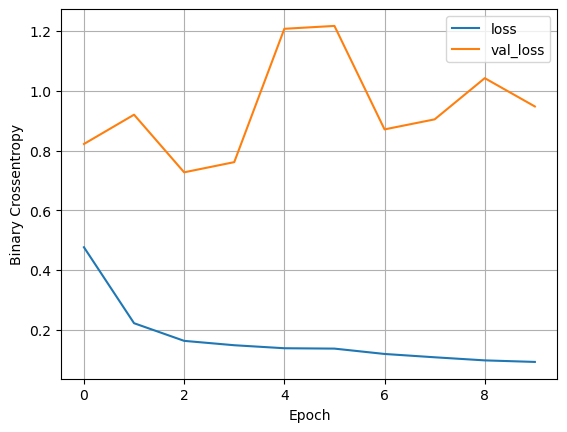

In [236]:
plot_history(history)

# Build Model

### Logistic Regression ###

In [237]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [238]:
y_pre = lg_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77        99
           1       0.57      0.86      0.68        50

    accuracy                           0.73       149
   macro avg       0.73      0.76      0.72       149
weighted avg       0.79      0.73      0.74       149



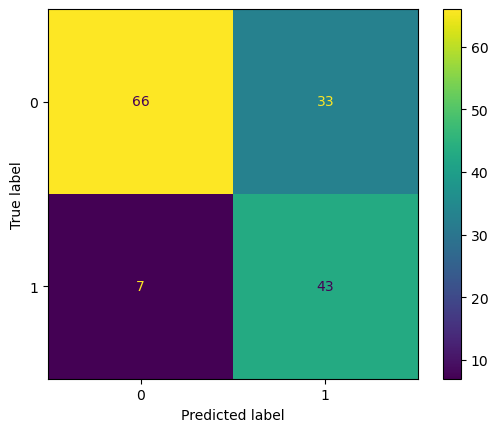

In [239]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Supporting Vector Machine ###

In [240]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [241]:
y_pre = svm_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.88      0.62      0.73        99
           1       0.53      0.84      0.65        50

    accuracy                           0.69       149
   macro avg       0.70      0.73      0.69       149
weighted avg       0.76      0.69      0.70       149



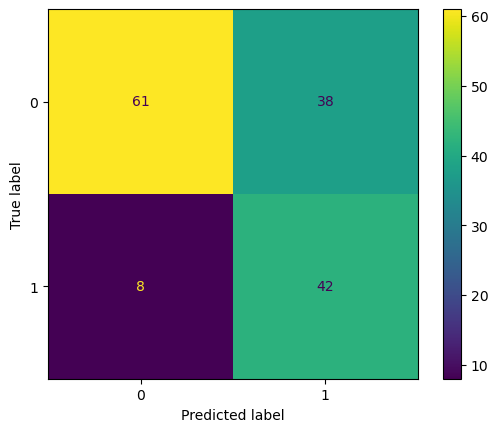

In [242]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Gaussian Naive Bays ###

In [243]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [244]:
y_pre = nb_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        99
           1       0.55      0.82      0.66        50

    accuracy                           0.72       149
   macro avg       0.72      0.74      0.71       149
weighted avg       0.77      0.72      0.73       149



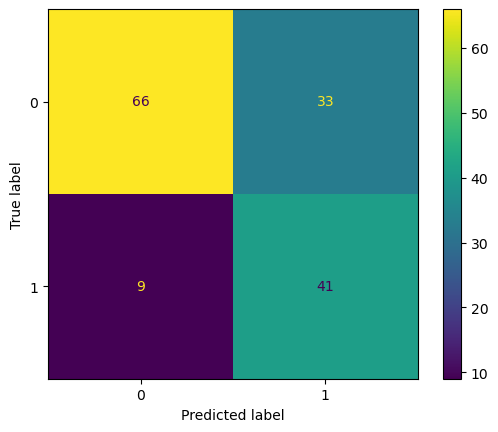

In [245]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### **Tuning for GaussianNB**

In [246]:
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # The regularization term (for smoothing the variance)
    
}

nb_model = GaussianNB()
grid_search = GridSearchCV(estimator = nb_model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
# Fit the model
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'var_smoothing': 1e-09}

In [247]:
y_pre = grid_search.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        99
           1       0.55      0.82      0.66        50

    accuracy                           0.72       149
   macro avg       0.72      0.74      0.71       149
weighted avg       0.77      0.72      0.73       149



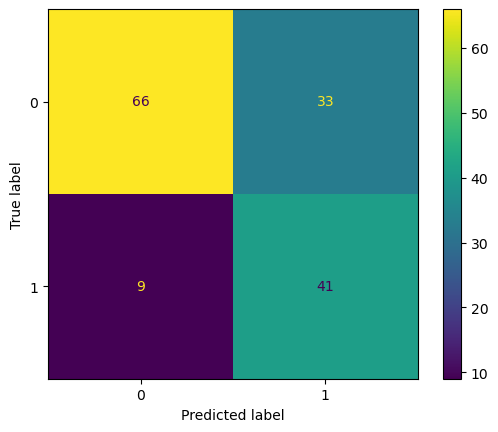

In [248]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Random Forest ###

In [249]:
rf_model = RandomForestClassifier(criterion='gini',
                                  max_depth=8,
                                  min_samples_split=10)
rf_model.fit(x_train, y_train)
y_pre = grid_search.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        99
           1       0.55      0.82      0.66        50

    accuracy                           0.72       149
   macro avg       0.72      0.74      0.71       149
weighted avg       0.77      0.72      0.73       149



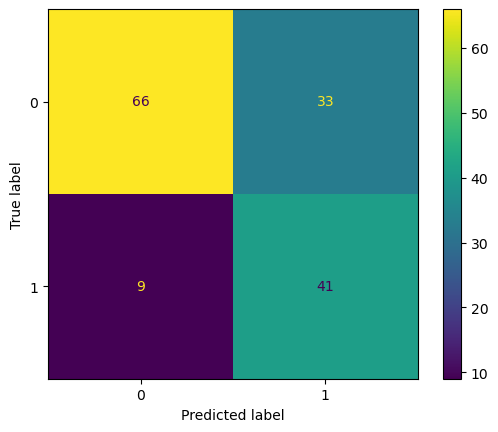

In [250]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()